# Adult Census Income Prediction Model

### Done By :- 
<li>Sagar Raj - 34</li>
<li>Praful Karan - 13</li>
<li>Pranavi Chintakindi - 04</li>
<li>Shashi Ranjan - 37</li>

## Step 1: Description: 

<ul>
<li><p>
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.
</p></li>
    
<li><p>
The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded <a href="https://www.kaggle.com/overload10/adult-census-dataset">here</a>.
</p></li> 

<li><p>
The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.
</p></li>  
</ul>

In [52]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
df=pd.read_csv('../Datasets/adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [55]:
df.shape

(32561, 15)

In [56]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [59]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
salary                2
dtype: int64

In [60]:
#seeing the unique values in specific features
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

<AxesSubplot:>

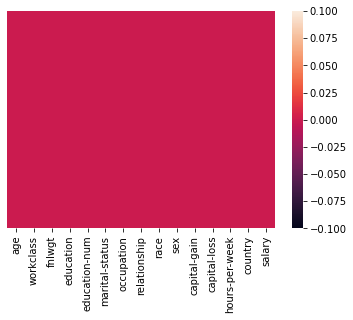

In [61]:
#checking for null values through heatmap
sns.heatmap(df.isnull(),yticklabels=False)

In [62]:
#Check for null values(percentage)
pd.DataFrame([(col,df[col].isna().mean()*100) for col in df],columns=["Feature","Percentage"])

,Feature,Percentage
0,age,0.0
1,workclass,0.0
2,fnlwgt,0.0
3,education,0.0
4,education-num,0.0
5,marital-status,0.0
6,occupation,0.0
7,relationship,0.0
8,race,0.0
9,sex,0.0


In [63]:
#Check for '?' in dataset
pd.DataFrame([(col,df[col].isin([' ?']).mean()*100) for col in df],columns=["Feature","Percentage"])

,Feature,Percentage
0,age,0.000000
1,workclass,5.638647
2,fnlwgt,0.000000
3,education,0.000000
4,education-num,0.000000
5,marital-status,0.000000
6,occupation,5.660146
7,relationship,0.000000
8,race,0.000000
9,sex,0.000000


In [64]:
# Checking the counts of label categories
salary = df['salary'].value_counts(normalize=True)
round(salary * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: salary, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.
</p></li>    

<li><p style="font-family:verdana;">
The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.
</p></li>    

</ul>

</div>

<h3>Feature Engineering</h3>
<h5>Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features.</h5>

In [65]:
df.education=df.education.replace(['Preschool','1st-4th','5th-6th','12th','9th','7th-8th','10th','11th'],'school',regex=True)
df.education=df.education.replace('HS-grad','High-school',regex=True)
df.education=df.education.replace(['Some-college','Bachelors','Assoc-voc','Assoc-acdm'],'undergrad',regex=True)
df.education=df.education.replace(['Masters','Prof-school'],'Postgrad',regex=True)


In [66]:
df['marital-status']=df['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married',regex=True)
df['marital-status']=df['marital-status'].replace('Never-married','un-married',regex=True)
df['marital-status']=df['marital-status'].replace(['Divorced','Separated','Widowed'],'others',regex=True)

In [67]:
df.salary=df.salary.replace('<=50K',0,regex=True)
df.salary=df.salary.replace('>50K',1,regex=True)

In [68]:
df['salary']=df['salary'].apply(int)

In [69]:
df['salary'].dtypes

dtype('int64')

In [70]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,undergrad,13,un-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,undergrad,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,High-school,9,others,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,undergrad,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [71]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,undergrad,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,High-school,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,High-school,9,others,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,High-school,9,un-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,High-school,9,Married,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


## Step 2: Data Visualization

In [72]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
salary,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


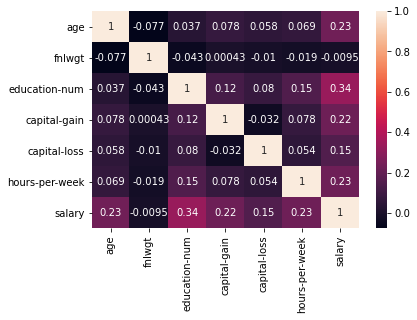

In [73]:
sns.heatmap(df.corr(),annot=True);

From the above correlation heatmap, we can say that the highest correlation is between education-num and salary. 

<AxesSubplot:xlabel='education'>

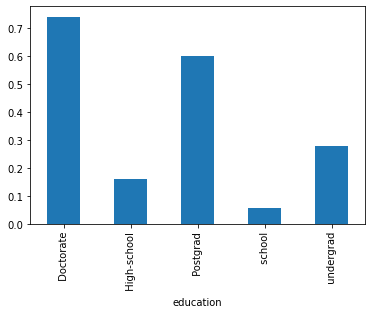

In [74]:
df.groupby('education').salary.mean().plot(kind='bar')

From this above bar plot, we can say that adults who are having an education background of Doctorate and Post-grad are having a better income and it is highly possible that their income is more than 50K.

<AxesSubplot:xlabel='marital-status'>

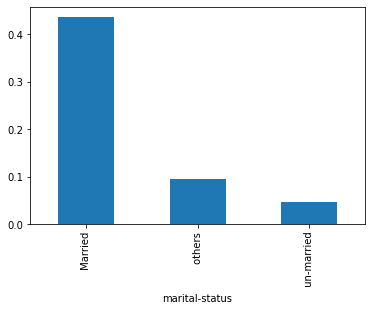

In [75]:
df.groupby('marital-status').salary.mean().plot(kind='bar')

From the above chart, we can say that adults who are married are more likely to have a beter income than their unmarried counterparts. And are also likely to have a income above 50K.

<AxesSubplot:xlabel='sex'>

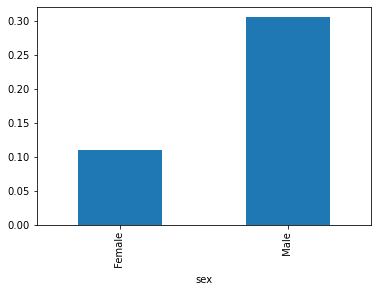

In [76]:
df.groupby('sex').salary.mean().plot(kind='bar')

From the above chart, we can say that Male adults are more likely to earn better than their female counterparts.

<AxesSubplot:xlabel='race'>

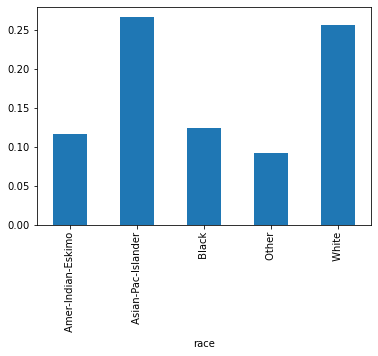

In [77]:
df.groupby('race').salary.mean().plot(kind='bar')

From the above chart, we can say that races of Asian-Pac-Islander and White adults are morely likely to earn a income of more than 50K.

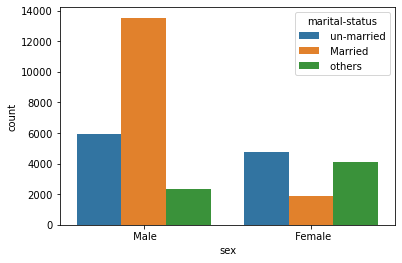

In [78]:
sns.countplot(df['sex'],hue='marital-status',data=df);


From this, we can see that married male adults are having the most observations in the dataset

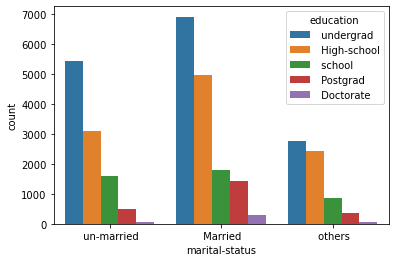

In [79]:
sns.countplot(df['marital-status'],hue="education",data=df);

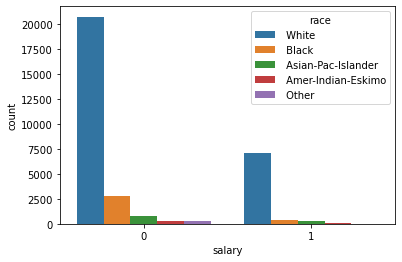

In [80]:
sns.countplot(df['salary'],hue="race",data=df);

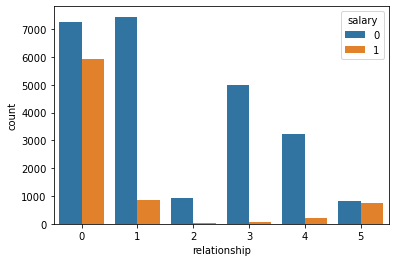

In [106]:
sns.countplot(df['relationship'],hue="salary",data=df);

### Histogram

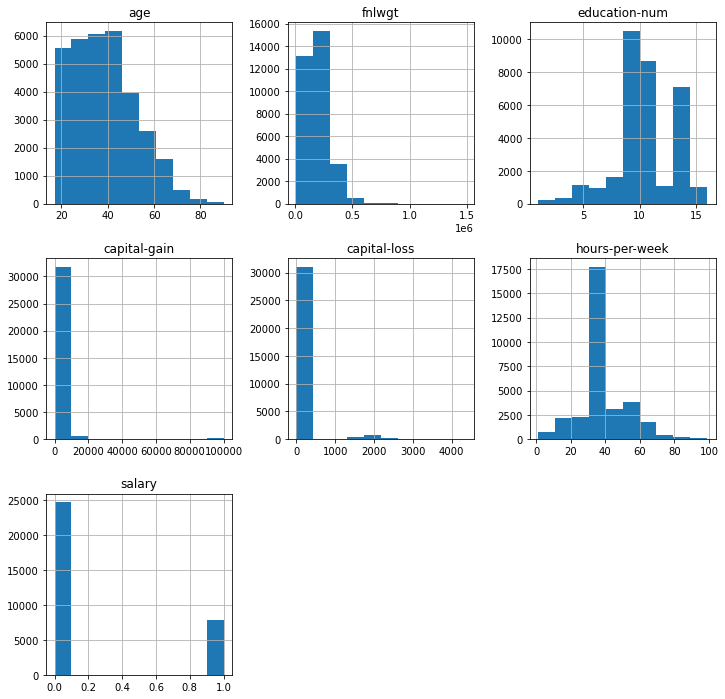

In [83]:
df.hist(figsize=(12,12),layout=(3,3));

### Box Plot

Text(0.5, 1.0, 'Box plot of INCOME and AGE')

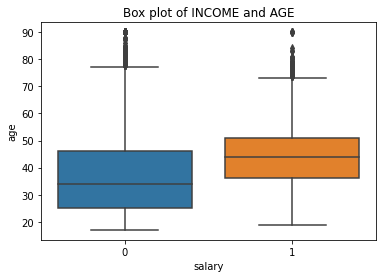

In [82]:
sns.boxplot(x='salary',y='age',data=df).set_title('Box plot of INCOME and AGE')

Text(0.5, 1.0, 'Box plot of Salary and Education')

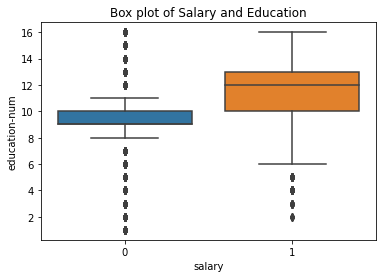

In [108]:
sns.boxplot(x='salary',y='education-num',data=df).set_title('Box plot of Salary and Education')

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
In this dataset, the most number of people are young, white, male, Undergraduates with 10 years of education and work 40 hours per week.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can see that the dependent feature 'salary' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.
</p></li>    

</ul>

</div>

## Step 3: Data Preprocessing

### 3.1: Fixing '?' values in the dataset

In [85]:
df = df.replace(' ?', np.nan)

In [86]:
# Checking null values
pd.DataFrame([(col,df[col].isna().mean()*100) for col in df],columns=["Feature","Percentage"])

,Feature,Percentage
0,age,0.000000
1,workclass,5.638647
2,fnlwgt,0.000000
3,education,0.000000
4,education-num,0.000000
5,marital-status,0.000000
6,occupation,5.660146
7,relationship,0.000000
8,race,0.000000
9,sex,0.000000


In [87]:
columns_with_nan = ['workclass', 'occupation', 'country']

In [88]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

### 3.2: Label Encoding
<ul>
<li>In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns.</li>
<li>Label Encoding basically converts the labels into a numeric form so as to convert them into the machine-readable form.</li>
</ul>

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

### 3.3: Feature Selection

In [91]:
X=df.drop('salary',axis=1)
Y=df['salary']

### ExtraTreesClassifier
<ul>
<li>ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees.</li>
<li>ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting.</li>
<li>Let’s look at some ensemble methods ordered from high to low variance, ending in ExtraTreesClassifier.</li>
<span>Decision Tree (High Variance)</span></br>
<span>Random Forest (Medium Variance)</span></br>
<span>Extra Trees (Low Variance)
<ul>
<li>Extra Trees is like Random Forest, in that it builds multiple trees and splits nodes using random subsets of features</li>
<li>It samples without replacement, and nodes are split on random splits, not best splits.</li>
<li>In Extra Trees, randomness doesn’t come from replacement of data, but rather comes from the random splits of all observations.</li>
</ul>
</span>
</ul>

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [93]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

<h5>Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.</h5>

In [94]:
feature_imp = selector.feature_importances_

In [95]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.03
1 4.13
2 16.92
3 3.52
4 9.17
5 10.95
6 7.34
7 6.51
8 1.43
9 2.37
10 8.73
11 2.75
12 9.61
13 1.53


In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  country         32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [97]:
X = X.drop(['capital-gain','fnlwgt', 'race','education-num',
            'capital-loss'], axis=1)

### 3.4: Feature Scaling
<ul>
<li>Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.</li>
<li>It is performed during the data pre-processing to handle highly varying magnitudes or values or units.</li>
<li>f feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.</li>
</ul>

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.5: Fixing imbalanced dataset using Oversampling

In [100]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: salary, dtype: object

### Imblearn
<li>Imblearn techniques are the methods by which we can generate a data set that has an equal ratio of classes.</li>

In [101]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
ros.fit(X, Y)

In [ ]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [ ]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

## Step 4: Data Modelling

### Importing Classifier model From Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Importing Performance check Score from Libraries


In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### USING GRIDSEARCH CV
<ul>
<li>GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.</li>
<li>Gridsearchcv by cross-validations will find out the best value for the parameters mentioned.</li>
<li>There are 2 main methods which can be implemented on GridSearchcv they are fit and predict.</li>
</ul>

In [ ]:
model_params = {
    'random forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,10,20]
            
        }
    },
    'logistic regression':{
        'model':LogisticRegression(solver = 'liblinear',multi_class = 'auto'),
        'params':{
            'C':[1,10,20]
        }
    },
    'K Nearest Neighbors':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,5,10]
        }
    }
    
}

In [ ]:
scores = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv = 2,return_train_score = False)
    start=time.time()
    clf.fit(X_resampled,Y_resampled)
    stop=time.time()
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best parameter':clf.best_params_,
        'Training Time':stop-start,
    })

In [ ]:
final = pd.DataFrame(scores,columns = ['model','best_score','best parameter','Training Time'])
final

### SAVING THE MODEL USING JOBLIB

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_resampled, Y_resampled,test_size = 0.2)

In [ ]:
rfc.fit(x_train,y_train)

In [ ]:
new_y_test = np.array(y_test)

In [ ]:
new_y_test

In [ ]:
y_pred = rfc.predict(x_test)
rfc.score(x_test,y_test)

In [ ]:
import joblib

In [ ]:
filename = 'Adult_census_prediction.sav'
joblib.dump(rfc,filename)

In [ ]:
x_train

### Conclusion:

<ul>
    
<li><p>
In this project, we build various models like logistic regression, knn classifier, support vector classifier and random forest classifier.
</p></li>    

<li><p>
A hyperparameter tuned random forest classifier gives the highest accuracy score of 90.88.
</p></li>    

</ul>

### Future work:

<ul>
        
<li><p>
We have a large enough dataset, so we can use neural networks such as an artificial neural network to build a model which can result in better performance.
</p></li>    

</ul>

</div>